<a href="https://colab.research.google.com/github/tastiz/projects.py/blob/master/WorkingFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As a data analyst, a new client that deals in the insurance industry wishes to uncover if bmi calcuation is a useful metric for determining the charges associated with hospital visits.  In addtion, the company wishes to identify if regions or smoking status also is effecting overall charges.  

As an analyst for this firm, an insurance company has provided information on their patients to help build visulations to help show the costs associated with smoking.  With this dataset, trends in patients bmi and charges and how factors such as sex, smoking status and region effecting the overal cost for care.

The client ultimately wants to understand their data more and decide how they wish to sepearte their insurance funds to best anticipate costs for premiums.  


In [0]:
#Intial setup for project
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns 
from scipy import stats
import math
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Database credentials
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'medicalcosts'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
insurance_df = pd.read_sql_table('medicalcosts', con=engine)

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

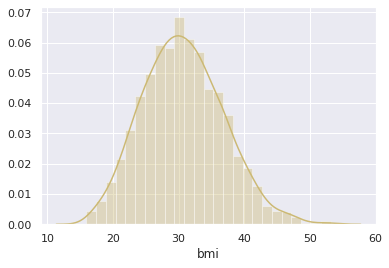

In [121]:
#histogram of bmi distribution appearing to be normal
bmi_ax = sns.distplot(insurance_df['bmi'], color="y")

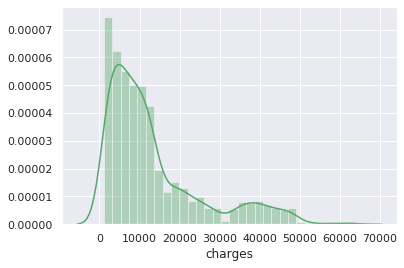

In [33]:
#histogram of charges
charges_ax = sns.distplot(insurance_df['charges'], color="g")

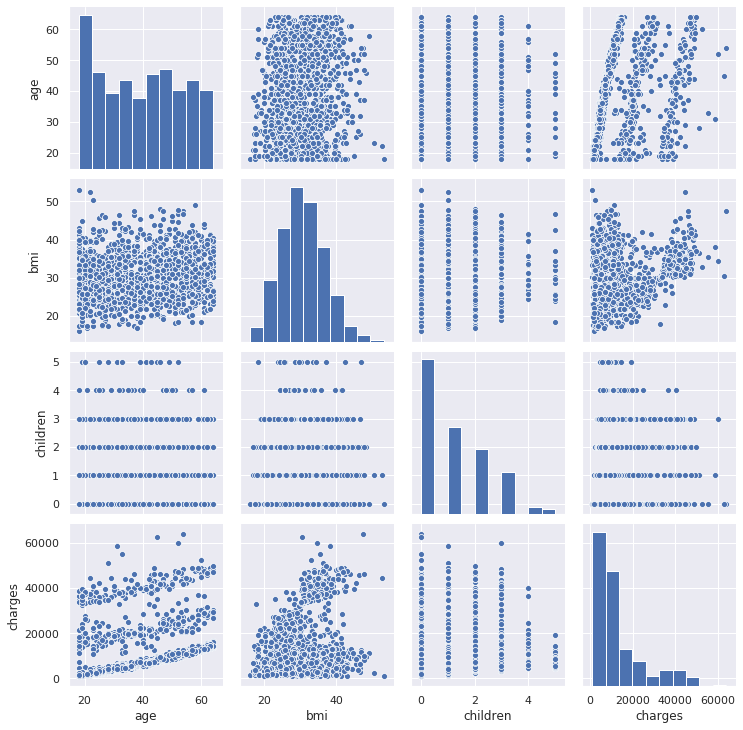

In [91]:
#rough analysis of possible correlations between vairables
sns.pairplot(insurance_df)

### From the pairplot function, it appears to be a pattern and weak correlation between age and charges creating tiered stratas.  Initially examining sex as a contributing variable to the stratas, smoking status is shown to be a driving force of charge increase and creation of the stratas.  This trend was seen in each region as well.  

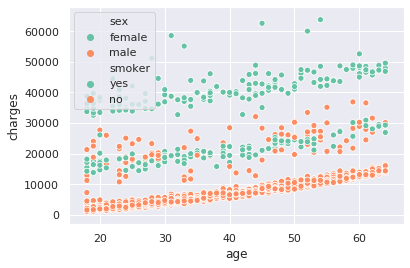

In [86]:
#investigating correlation of charges to age
sns.scatterplot(x="age", y="charges", hue="sex",palette="Set2", data=insurance_df)

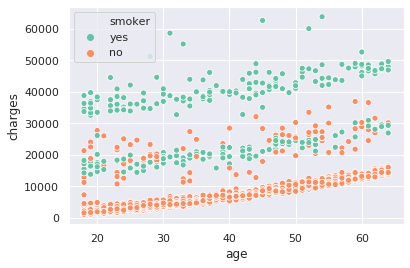

In [66]:
sns.scatterplot(x="age", y="charges", hue="smoker", palette="Set2", data=insurance_df)

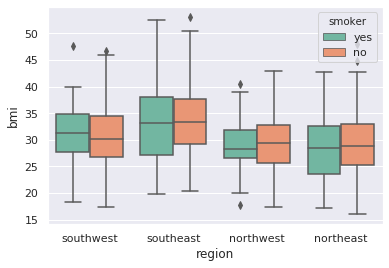

In [94]:
sns.boxplot(y="charges",x="region", hue="smoker", palette="Set2", data=insurance_df)

## To further examine the correlation, the data set was split into tables of smokers and non smokers to evaluate if the charges were significantly different.

In [0]:
#Creates tables based on smoking status
smoker_yes = (insurance_df['smoker'] == "yes") 
smoker_yes_df = insurance_df.iloc[smoker_yes.values]
smoker_no = (insurance_df['smoker']== "no")
smoker_no_df = insurance_df.iloc[smoker_no.values]

## With a p-value of very close to zero, we can reject the null hypothesis with 95% certainty.  

In [88]:
#Tests for significant difference in charges for smokers vers non smokers
stats.ttest_ind(smoker_yes_df['charges'], smoker_no_df['charges'])

Ttest_indResult(statistic=46.66492154643642, pvalue=8.271380969131679e-283)

In [118]:
get_95_ci(smoker_no_df['charges'],smoker_yes_df['charges'])

'The difference in means at the 95% confidence interval (two-tail) is between 22202.693942567694 and 25029.235867404368.'

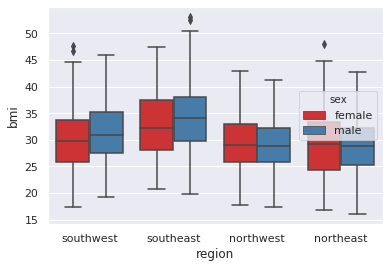

In [99]:
sns.boxplot(y="bmi",x="region", hue="sex", palette="Set1", data=insurance_df)

In [0]:
southwest = (insurance_df['region'] == "southwest")
southwest_df = insurance_df.iloc[southwest.values]
southeast = (insurance_df['region'] == "southeast")
southeast_df = insurance_df.iloc[southeast.values]
northwest = (insurance_df['region'] == "northwest")
northwest_df = insurance_df.iloc[northwest.values]
northeast = (insurance_df['region'] == "northeast")
northeast_df = insurance_df.iloc[northeast.values]

## The only region that did not have a statistical difference in both bmi and charges was between the northern regions of the country.  All other comparisions showed statisical difference in bmi and incosistently for charges.

In [105]:
#rejects the null hypothesis
stats.ttest_ind(southwest_df['bmi'],southeast_df['bmi'])

Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)

In [110]:
#accepts the null hypothesis
stats.ttest_ind(southwest_df['charges'],southeast_df['charges'])

Ttest_indResult(statistic=-2.428176796786148, pvalue=0.015430674667805226)

In [104]:
#accepts the null hypotheis
stats.ttest_ind(northwest_df['bmi'], northeast_df['bmi'])

Ttest_indResult(statistic=0.060307727183293185, pvalue=0.951929170821864)

In [108]:
#accepts the null hypothesis
stats.ttest_ind(northwest_df['charges'], northeast_df['charges'])

Ttest_indResult(statistic=-1.1281679372273878, pvalue=0.2596671673068375)

In [106]:
#rejects the null hypothesis
stats.ttest_ind(northwest_df['bmi'], southwest_df['bmi'])

Ttest_indResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695)

In [111]:
#accepts the null hypothesis
stats.ttest_ind(northwest_df['charges'], southwest_df['charges'])

Ttest_indResult(statistic=0.07956640964937679, pvalue=0.9366066766909533)

In [107]:
#rejects the null hypothesis
stats.ttest_ind(northeast_df['bmi'], southeast_df['bmi'])

Ttest_indResult(statistic=-8.790905562598699, pvalue=1.186014937424813e-17)

In [112]:
#accepts the null hypothesis
stats.ttest_ind(northeast_df['charges'], southeast_df['charges'])

Ttest_indResult(statistic=-1.363167104165983, pvalue=0.17327708539423628)

After examining the data